In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as mp
import pandas as pd

## PART 1 

#### Get all datasets

In [101]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

#### Load Penguins dataset

In [102]:
df=sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Drop Null Records

In [103]:
df1 = df.dropna()
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Count of records which were dropped

In [104]:
print("No of records dropped",len(df)-len(df1))

No of records dropped 11


#### Create a column which number of penguins on each island

In [105]:
df1['penguin_count'] = df1['island'].groupby(df1['island']).transform('count')
df1

<ipython-input-105-382d61014f51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['penguin_count'] = df1['island'].groupby(df1['island']).transform('count')


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,penguin_count
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,47
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,47
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,47
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,47
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,47
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,163
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,163
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,163
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,163


#### Create a column which has mean bill length of each species

In [106]:
df1['mean_bill_length'] = df1['bill_length_mm'].groupby(df1['species']).transform('mean')
df1

<ipython-input-106-ad41d1c3878c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean_bill_length'] = df1['bill_length_mm'].groupby(df1['species']).transform('mean')


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,penguin_count,mean_bill_length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,47,38.823973
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,47,38.823973
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,47,38.823973
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,47,38.823973
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,47,38.823973
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,163,47.568067
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,163,47.568067
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,163,47.568067
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,163,47.568067


## Part 2

#### Create a column which has the weighted mean of bill length and bill depth of species
#### bill length weight=0.7 and bill depth weight=0.3

#### weighted mean= (w1*n1+w2*n2) / (w1+w2)

In [107]:
def add_weighted_mean_column(row,w_length=0.7, w_depth=0.3):
    return (w_length * row['bill_length_mm'] + w_depth * row['bill_depth_mm'])/2
    
    
df1['bill_weighted_mean'] = df1.apply(lambda row: add_weighted_mean_column(row), axis=1)

<ipython-input-107-c038ab939aad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bill_weighted_mean'] = df1.apply(lambda row: add_weighted_mean_column(row), axis=1)


In [108]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,penguin_count,mean_bill_length,bill_weighted_mean
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,47,38.823973,16.490
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,47,38.823973,16.435
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,47,38.823973,16.805
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,47,38.823973,15.740
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,47,38.823973,16.845
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,163,47.568067,18.575
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,163,47.568067,18.525
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,163,47.568067,19.995
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,163,47.568067,18.040


## Part 3

#### Plot a scatter plot with bill length on x and bill depth on y where the color of points is the species and style is the island

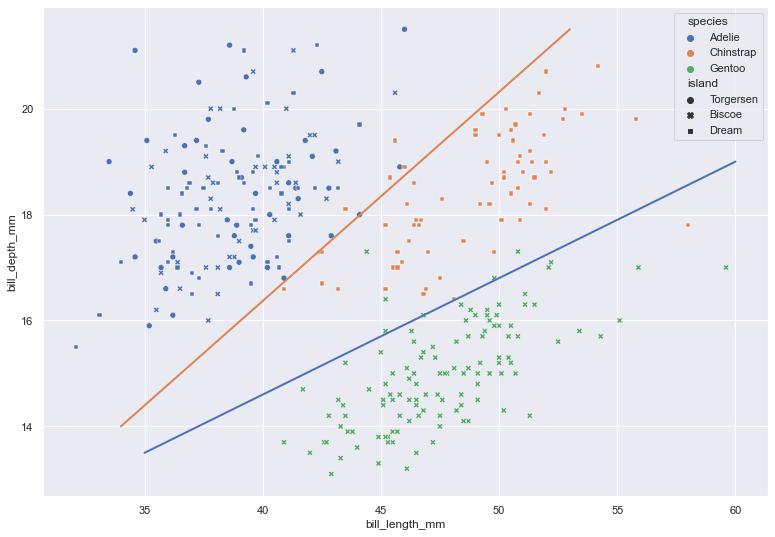

In [109]:
sns.scatterplot(data=df1, x="bill_length_mm", y="bill_depth_mm", hue="species", style="island")
plt.plot([35,60],[13.5,19],linewidth=2)
plt.plot([34,53],[14,21.5],linewidth=2)